In [19]:
from osgeo import ogr
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import triang
import numpy as np

## Plots

In [20]:
bh_file_path = 'profile_Till_Summary.csv'
df = pd.read_csv(bh_file_path, header=[0])

In [21]:
df

,Unnamed: 0,layerClass,depthBegin,depthEnd,Till_perc,Organics_perc,Boulder_perc,Ice_perc,Clay_perc,Gravel/Cobbles_perc,...,Frozen_max,Gravel_perc_max,Sand_perc_max,Fines_perc_max,ExIceCont_perc_mode,GWCWetBase_perc_mode,Frozen_mode,Gravel_perc_mode,Sand_perc_mode,Fines_perc_mode
0,0,1.0,0.0,1.3,0.545455,0.090909,0.045455,0.00000,0.0,0.045455,...,1.0,85.0,90.0,65.0,-19.241364,-5.760455,-0.045455,-14.090909,77.363636,-29.136364
1,1,0.0,1.4,4.4,0.829268,0.024390,0.000000,0.02439,0.0,0.024390,...,1.0,85.0,90.0,65.0,11.992683,19.730488,1.487805,-23.170732,69.463415,-10.731707
2,2,2.0,4.5,9.9,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,1.0,85.0,65.0,60.0,48.152000,84.464500,1.000000,63.000000,24.750000,-17.750000


In [32]:
min = np.array(df.ExIceCont_perc_min)
max = np.array(df.ExIceCont_perc_max)
mode = np.array(df.ExIceCont_perc_mode)
mean = np.array(df.ExIceCont_perc_Mean)

<Figure size 432x288 with 0 Axes>

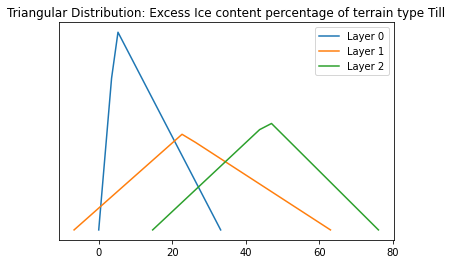

In [55]:
plt.clf()
fig, ax = plt.subplots(1,1)

for i in range(len(min)):
    scale = max[i]-min[i]
    c = np.divide(mean[i] - min[i], scale)
    x = np.linspace(min[i], max[i], 20)
    y = triang.pdf(x, c, min[i], scale)
    ax.plot(x, y, label="Layer {}".format(i))

plt.legend()
plt.title("Triangular Distribution: Excess Ice content percentage of terrain type Till")
plt.gca().axes.get_yaxis().set_visible(False)

In [6]:
filter_field = 'ULABLE1'
value = 'Th'

in_shapefile = r'C:\Users\mouju\Downloads\cgm_0184_p2\Data\SHP\Surficial\GEO_POLYS.shp'
out_shapefile = 'lacdegras_{}.shp'.format(value)

query_str = '"{}" = "{}"'.format(filter_field, value)

In [7]:
DriverName = "ESRI Shapefile"      # e.g.: GeoJSON, ESRI Shapefile
driver = ogr.GetDriverByName(DriverName)

In [8]:
out_ds = driver.CreateDataSource(out_shapefile)

In [11]:
daShapefile = in_shapefile
dataSource = driver.Open(daShapefile, 0) # 0 means read-only. 1 means writeable.
# Check to see if shapefile is found.
if dataSource is None:
    print('Could not open %s' % (daShapefile))
else:
    print('Opened %s' % (daShapefile))
    layer = dataSource.GetLayer()
    featureCount = layer.GetFeatureCount()
    print("Number of features in %s: %d" % (os.path.basename(daShapefile),featureCount))

Opened C:\Users\mouju\Downloads\cgm_0184_p2\Data\SHP\Surficial\GEO_POLYS.shp
Number of features in GEO_POLYS.shp: 3895


In [12]:
layer.SetAttributeFilter("ULABEL1 = 'Th'")

0

In [15]:
out_layer = out_ds.CopyLayer(layer, str(value))
del layer, out_layer, out_ds